In [4]:
import pandas as pd
import os

csvs = [f for f in os.listdir() if f.endswith('.csv')]
dfs = {f: pd.read_csv(f) for f in csvs}
for f, df in dfs.items():
    print(f)
    print(df.head())
    print()

accuracy_all_same_transforms-train_1024.csv
             model  accuracy
0  ConvNeXtV2_Nano    0.8877
1           DeiT_S    0.8809
2           DeiT_T    0.7930
3      DenseNet121    0.8135
4  EfficientNet_B3    0.8740

accuracy_all_same_transforms-val_1024.csv
             model  accuracy
0  ConvNeXtV2_Nano    0.8916
1           DeiT_S    0.8984
2           DeiT_T    0.7852
3      DenseNet121    0.8047
4  EfficientNet_B3    0.8838

accuracy_model_specific_transforms-train_1024.csv
             model  accuracy
0  ConvNeXtV2_Nano    0.9111
1           DeiT_S    0.8984
2           DeiT_T    0.7930
3      DenseNet121    0.8467
4  EfficientNet_B3    0.9326

accuracy_model_specific_transforms-val_1024.csv
             model  accuracy
0  ConvNeXtV2_Nano    0.9238
1           DeiT_S    0.9131
2           DeiT_T    0.8066
3      DenseNet121    0.8486
4  EfficientNet_B3    0.9434



In [10]:
type(df_21)

pandas.core.series.Series

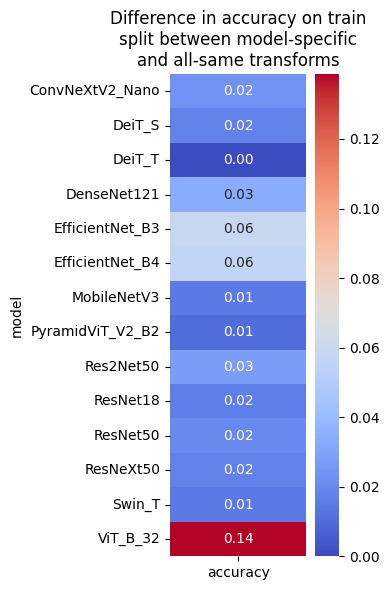

In [87]:
# compare accuracy_all_same_transforms-train_1024.csv with accuracy_model_specific_transforms-train_1024.csv
df1 = dfs['accuracy_all_same_transforms-train_1024.csv']
df2 = dfs['accuracy_model_specific_transforms-train_1024.csv']
df_21 = df2['accuracy'] - df1['accuracy']
df_21 = df_21.to_frame()
df_21.columns = ['accuracy']
df_21.index = df2['model']

# plot the difference as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 6))
sns.heatmap(df_21, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
plt.title('Difference in accuracy on train\nsplit between model-specific\nand all-same transforms')
plt.subplots_adjust(left=0, right=0.4)
plt.tight_layout()
plt.savefig('diff_train')
plt.show()


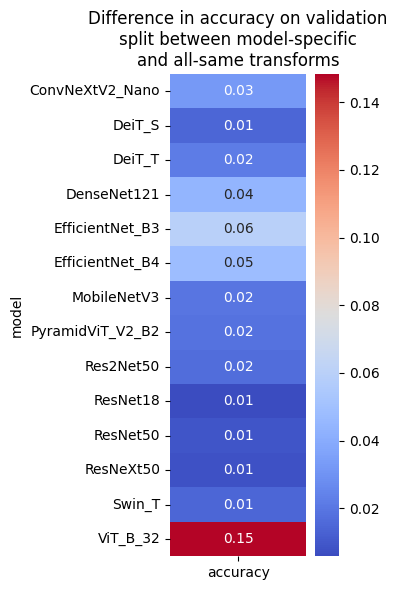

In [86]:
# compare accuracy_all_same_transforms-val_1024.csv with accuracy_model_specific_transforms-val_1024.csv
df1 = dfs['accuracy_all_same_transforms-val_1024.csv']
df2 = dfs['accuracy_model_specific_transforms-val_1024.csv']
df_21 = df2['accuracy'] - df1['accuracy']
df_21 = df_21.to_frame()
df_21.columns = ['accuracy']
df_21.index = df2['model']

# plot the difference as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 6))
sns.heatmap(df_21, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
plt.title('Difference in accuracy on validation\nsplit between model-specific\nand all-same transforms')
plt.subplots_adjust(left=0, right=0.4)
plt.tight_layout()
plt.savefig('diff_val.png')
plt.show()
